In [212]:
import numpy as np
import matplotlib.pyplot as plt

In [333]:
chain = np.load('../runs/chain_3_2_std_mm.npy')

11.920816551816138 13.467429421343853


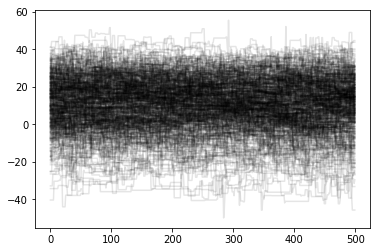

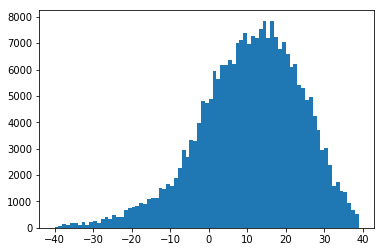

In [334]:
i = 6
clip = 2500
plt.plot(chain[0:,clip:,i].T, 'k', alpha=0.1)
print(np.median(chain[:,clip:,i]), np.std(chain[:,clip:,i]))
plt.show()

plt.hist(chain[:,clip:,i].flatten(), np.arange(-40, 40, 1))
plt.show()

In [335]:
sc = np.shape(chain)

In [336]:
clip = 2000
igburn = chain[:,clip:,:].flatten().reshape(sc[0]*(sc[1]-clip),sc[2])

si = np.shape(igburn)
rand = np.random.randint(0, si[0], 100)

In [337]:
rand

array([327325, 223955, 386518, 353578, 421623, 177269, 192445, 399265,
       497261, 237810, 479144, 298927,  53327, 223501, 418859, 308596,
       104805, 125575, 195777, 362830, 255191, 394822, 270181,  34039,
       174308, 315949, 151987, 277139, 406370,   1779,  76094, 288824,
        25304, 432008, 373304, 155085,  95129, 300881, 306703, 223897,
       469346, 205456, 461278, 383998, 323154,  79904, 375414, 225438,
       438493, 353361, 193515, 251956,  28799, 475871, 378387,  39351,
       177947,  38111, 223395, 113247, 448448, 150095, 293090, 413013,
       152408, 294827, 262356, 410191, 217082, 416337, 306980, 103651,
       335912, 167198,  91060, 344778,  98888, 237561, 436108,  21954,
        80808, 260030,  31736, 492745, 411343,  37987, 137678, 493138,
        43870, 106676, 207855,  72233,  12700, 287037, 218807,  46863,
        74236, 123418, 190043, 394580])

In [338]:
import starry


time, vels, verr = np.loadtxt('../data/vst222259.ascii', usecols=[1,2,3], unpack=True)

time = time[:-4]
vels = vels[:-4]
verr = verr[:-4]

time -= 18706.5

map = starry.Map(ydeg=4, udeg=2, rv=True, lazy=False)
map.reset()

Prot = 2.85             # days
P = 8.1387              # days
e = 0.0
w = 0.0
inc = 90.0

tuse = time + 0.0
euse = verr + 0.0
vuse = vels + 0.0

def rmcurve(tarr, params):

    vsini, r, b, a, u1, u2, obl, gamma, gammadot, gammadotdot, gamma3, gamma4, jitter_good, jitter_bad, q, factor, t0 = params
    veq = vsini / np.sin(inc * np.pi / 180.0)

    map.inc = inc
    map.obl = obl
    # map.add_spot(spot_amp, sigma=spot_sig, lon=spot_lon, lat=-spot_lat)
    map[1:] = [u1, u2]
    map.veq = veq

    f = (tarr - t0) / P * 2 * np.pi
    I = np.arccos(b / a)

    zo = a * np.cos(f)
    yo = -a * np.sin(np.pi / 2 + f) * np.cos(I)
    xo = a * np.sin(f) * np.sin(I)
    
    #gamma3 = 0.0
    gamma4 = 0.0

    theta = 360.0 / Prot * tarr

    rv_0 = map.rv(xo=xo, yo=yo, zo=zo, ro=r, theta=theta)
    trend = gamma + gammadot * (tarr - 0.15) + gammadotdot * (tarr - 0.15) ** 2 + gamma3*(tarr-0.15)**3 + gamma4*(tarr-0.15)**4
    rv = rv_0 + trend
    
    return rv, trend

In [339]:
tarr = np.arange(0, 0.5, 0.001)
rv_out = np.zeros((100, len(tarr)))
trend_out = np.zeros((100, len(tarr)))

for i in range(100):
    rv_out[i], trend_out[i] = rmcurve(tarr, igburn[rand[i]])

Compiling `rv`... Done.


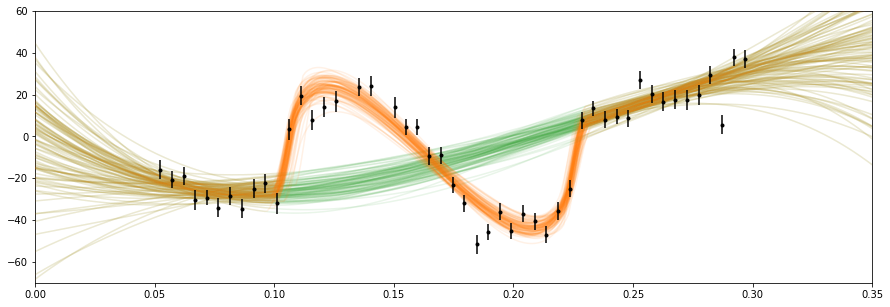

In [340]:
plt.figure(figsize=(15,5))

plt.plot(tarr, rv_out.T, 'C1', alpha=0.1, zorder=3)
plt.plot(tarr, trend_out.T, 'C2', alpha=0.1)

plt.errorbar(time, vels, yerr=verr, fmt='k.', zorder=5)

plt.ylim(-70, 60)
plt.xlim(0.0, 0.35)

plt.show()
